In [1]:
# from scipy.spatial import KDTree
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import GridSearchCV



In [2]:
# # Load datasets
# dataset1 = pd.read_csv("data/workout_fitness_tracker_data.csv")
# dataset2 = pd.read_csv("data/health_fitness_dataset.csv")

# dataset1["BMI"] = dataset1["Weight (kg)"] / ((dataset1["Height (cm)"] / 100) ** 2)

# # Standardize Gender Labels
# gender_map = {"Male": "M", "Female": "F", "Other": "Other"}  # Keep "Other"
# dataset1["Gender"] = dataset1["Gender"].map(gender_map)

# # Rename Dataset 2 columns for consistency
# dataset2 = dataset2.rename(columns={
#     "age": "Age",
#     "height_cm": "Height (cm)",
#     "weight_kg": "Weight (kg)",
#     "resting_heart_rate": "Resting Heart Rate (bpm)",
#     "bmi": "BMI",
#     "gender": "Gender"
# })

# # Define matching features & their weights
# features = ["Age", "Height (cm)", "Weight (kg)", "Resting Heart Rate (bpm)", "BMI"]
# feature_weights = np.array([1, 1, 1, 3, 3])  # More weight for Resting HR & BMI

# # Separate "Other" from gender-based matching
# gender_groups = ["M", "F"]
# merged_dataframes = []

# for gender in gender_groups:  # Match "M" to "M" and "F" to "F"
#     ds1_filtered = dataset1[dataset1["Gender"] == gender].copy()
#     ds2_filtered = dataset2[dataset2["Gender"] == gender].copy()

#     # NEW: Drop rows with missing values in required features
#     ds1_filtered = ds1_filtered.dropna(subset=features)
#     ds2_filtered = ds2_filtered.dropna(subset=features)

#     if ds2_filtered.empty or ds1_filtered.empty:
#         print(f"⚠️ No matching users found in Dataset 2 for gender: {gender}")
#         continue

#     # Extract & normalize features
#     scaler = MinMaxScaler()
#     ds1_scaled = scaler.fit_transform(ds1_filtered[features]) * feature_weights
#     ds2_scaled = scaler.transform(ds2_filtered[features]) * feature_weights

#     # Check and clean NaN or inf values in scaled datasets
#     if np.any(np.isnan(ds1_scaled)) or np.any(np.isinf(ds1_scaled)):
#         print("Warning: NaN or Inf detected in ds1_scaled, cleaning...")
#         ds1_scaled = np.nan_to_num(ds1_scaled, nan=0.0, posinf=0.0, neginf=0.0)
        
#     if np.any(np.isnan(ds2_scaled)) or np.any(np.isinf(ds2_scaled)):
#         print("Warning: NaN or Inf detected in ds2_scaled, cleaning...")
#         ds2_scaled = np.nan_to_num(ds2_scaled, nan=0.0, posinf=0.0, neginf=0.0)

#     # KD-Tree for nearest-neighbor search
#     kd_tree = KDTree(ds2_scaled)
#     distances, best_matches = kd_tree.query(ds1_scaled, k=1)

#     # Merge results
#     best_match_df = ds2_filtered.iloc[best_matches].reset_index(drop=True)
#     merged_df = ds1_filtered.reset_index(drop=True).copy()

#     # Keep Dataset 1 values and add only unique columns from Dataset 2
#     ds2_unique_cols = [col for col in dataset2.columns if col not in dataset1.columns]
#     merged_df[ds2_unique_cols] = best_match_df[ds2_unique_cols].values
#     merged_df["Match Distance"] = distances  # Lower = better match

#     merged_dataframes.append(merged_df)
#     # if np.any(np.isnan(ds2_scaled)) or np.any(np.isinf(ds2_scaled)):
#     #     print("Warning: NaN or Inf detected in ds2_scaled, cleaning...")
#     #     ds2_scaled = np.nan_to_num(ds2_scaled, nan=0.0, posinf=0.0, neginf=0.0)

#     # # KD-Tree for nearest-neighbor search
#     # kd_tree = KDTree(ds2_scaled)
#     # distances, best_matches = kd_tree.query(ds1_scaled, k=1)

#     # # Merge results
#     # best_match_df = ds2_filtered.iloc[best_matches].reset_index(drop=True)
#     # merged_df = ds1_filtered.reset_index(drop=True).copy()

#     # # Keep Dataset 1 values and add only unique columns from Dataset 2
#     # ds2_unique_cols = [col for col in dataset2.columns if col not in dataset1.columns]
#     # merged_df[ds2_unique_cols] = best_match_df[ds2_unique_cols].values
#     # merged_df["Match Distance"] = distances  # Lower = better match

#     # merged_dataframes.append(merged_df)

# # Handle "Other" separately (match based on closest features, ignoring gender)
# ds1_other = dataset1[dataset1["Gender"] == "Other"].copy()
# if not ds1_other.empty:
#     scaler = MinMaxScaler()
#     ds1_other_scaled = scaler.fit_transform(ds1_other[features]) * feature_weights
#     ds2_all_scaled = scaler.transform(dataset2[features]) * feature_weights  # Match to all dataset2 users

#     # Check and clean NaN or inf values in scaled datasets
#     if np.any(np.isnan(ds1_other_scaled)) or np.any(np.isinf(ds1_other_scaled)):
#         print("Warning: NaN or Inf detected in ds1_other_scaled, cleaning...")
#         ds1_other_scaled = np.nan_to_num(ds1_other_scaled, nan=0.0, posinf=0.0, neginf=0.0)
        
#     if np.any(np.isnan(ds2_all_scaled)) or np.any(np.isinf(ds2_all_scaled)):
#         print("Warning: NaN or Inf detected in ds2_all_scaled, cleaning...")
#         ds2_all_scaled = np.nan_to_num(ds2_all_scaled, nan=0.0, posinf=0.0, neginf=0.0)

#     kd_tree = KDTree(ds2_all_scaled)
#     distances, best_matches = kd_tree.query(ds1_other_scaled, k=1)

#     best_match_df = dataset2.iloc[best_matches].reset_index(drop=True)
#     merged_other = ds1_other.reset_index(drop=True).copy()

#     # Add unique columns from Dataset 2
#     merged_other[ds2_unique_cols] = best_match_df[ds2_unique_cols].values
#     merged_other["Match Distance"] = distances  # Lower = better match

#     merged_dataframes.append(merged_other)

# # Combine results
# final_merged_dataset = pd.concat(merged_dataframes, ignore_index=True)

# # Optionally, save final dataset
# final_merged_dataset.to_csv("merged_dataset.csv", index=False)


In [3]:
# print(final_merged_dataset.columns)

In [4]:

# final_merged_dataset = final_merged_dataset.drop(columns=['User ID', 'duration_minutes', 'calories_burned', 'avg_heart_rate', 
#                       'daily_steps', 'Match Distance', 'hours_sleep', 
#                       'hydration_level', 'intensity', 'participant_id', 'date', 'activity_type', 'fitness_level'])

# # Display the updated DataFrame
# print(final_merged_dataset.columns)

# # final_merged_dataset = final_merged_dataset.drop(columns=['User ID', 'duration_minutes', 'calories_burned', 'avg_heart_rate', 
# #                       'daily_steps', 'Match Distance', 'hours_sleep', 
# #                       'hydration_level', 'intensity', 'participant_id', 'date', 'activity_type', 'fitness_level'])

# # # Display the updated DataFrame
# # print(final_merged_dataset.columns)

In [5]:
# final_merged_dataset.rename(columns={
#     'stress_level': 'Stress Level',
#     'blood_pressure_systolic': 'Blood Pressure Systolic',
#     'blood_pressure_diastolic': 'Blood Pressure Diastolic',
#     'health_condition': 'Health Condition',
#     'smoking_status': 'Smoking Status'
# }, inplace=True)

# # Display the updated DataFrame
# print(final_merged_dataset.columns)

In [27]:
# print(final_merged_dataset.dtypes)

In [28]:
# print(final_merged_dataset.isnull().sum())

In [29]:
# # Mbush vlerat që mungojnë në kolonën 'Health Condition' me "Not Specified"
# final_merged_dataset["Health Condition"] = final_merged_dataset["Health Condition"].fillna("Not Specified")

# print(final_merged_dataset.isnull().sum())

In [30]:
# Sigurohu që final_merged_dataset është i definuar dhe përmban të dhënat tuaja
# Krijo listën e kolonave numerike
# numerical_cols = final_merged_dataset.select_dtypes(include=['number']).columns

# # Boxplot për të parë shpërndarjen dhe outliers me grid më të madh (5x5)
# plt.figure(figsize=(20, 15))  # Zgjedhje e madhësisë së figurës

# for i, column in enumerate(numerical_cols, 1):
#     plt.subplot(5, 5, i)  # Përdorimi i një gridi 5x5
#     sns.boxplot(data=final_merged_dataset, x=column)
#     plt.title(f'Boxplot for {column}')

# plt.tight_layout()  # Sigurohet që të gjitha figurat të shfaqen pa mbivendosje
# plt.show()

#  Sigurohu që final_merged_dataset është i definuar dhe përmban të dhënat tuaja
# # Krijo listën e kolonave numerike
# numerical_cols = final_merged_dataset.select_dtypes(include=['number']).columns

# # Boxplot për të parë shpërndarjen dhe outliers me grid më të madh (5x5)
# plt.figure(figsize=(20, 15))  # Zgjedhje e madhësisë së figurës

# for i, column in enumerate(numerical_cols, 1):
#     plt.subplot(5, 5, i)  # Përdorimi i një gridi 5x5
#     sns.boxplot(data=final_merged_dataset, x=column)
#     plt.title(f'Boxplot for {column}')

# plt.tight_layout()  # Sigurohet që të gjitha figurat të shfaqen pa mbivendosje
# plt.show()

In [10]:
# final_merged_dataset = final_merged_dataset.drop(columns=["Water Intake (liters)", "Body Fat (%)", "VO2 Max"])

# # Funksioni për të larguar outliers duke përdorur IQR
# def remove_outliers_iqr(df, col):
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     # Filtrimi i të dhënave brenda kufijve të IQR-së
#     return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# # Largimi i outliers për kolona specifike
# final_merged_dataset = remove_outliers_iqr(final_merged_dataset, "BMI")
# final_merged_dataset = remove_outliers_iqr(final_merged_dataset, "Blood Pressure Systolic")
# final_merged_dataset = remove_outliers_iqr(final_merged_dataset, "Blood Pressure Diastolic")

In [11]:
# # Cakto kolonat që do të shfaqen
# cols_to_plot = ["BMI", "Blood Pressure Systolic", "Blood Pressure Diastolic"]

# # Boxplot për secilën kolone
# plt.figure(figsize=(15, 10))
# for i, column in enumerate(cols_to_plot, 1):
#     plt.subplot(2, 3, i)  # Grid 2x3 për 3 kolona
#     sns.boxplot(data=final_merged_dataset, x=column)
#     plt.title(f'Boxplot for {column}')
#     plt.tight_layout()

# plt.show()

In [12]:
# # Definimi i kolonave që do të kodohen
# label_encode_cols = ["Mood Before Workout", "Mood After Workout", "Smoking Status", "Health Condition", "Gender"]
# one_hot_encode_cols = ["Workout Type", "Workout Intensity"]

# # Aplikimi i Label Encoding
# label_encoder = LabelEncoder()
# for col in label_encode_cols:
#     final_merged_dataset[col] = label_encoder.fit_transform(final_merged_dataset[col])

# # Aplikimi i One-Hot Encoding
# final_merged_dataset = pd.get_dummies(final_merged_dataset, columns=one_hot_encode_cols, drop_first=True)

# # Shfaq disa rreshta për të parë rezultatin
# print(final_merged_dataset.head())

In [13]:
# # Korelacioni i kolonave me BMI
# correlation_with_bmi = final_merged_dataset.corr()['Calories Burned'].drop('Calories Burned').sort_values(ascending=False)
# print(correlation_with_bmi)

In [14]:
# # Shfaqim disa informacione mbi datasetin për të parë kolonat
# print(final_merged_dataset.info())

# # Përcaktojmë variablat për trajnimin:
# # Target variable (etiketa) është "Calories Burned"
# target = 'Calories Burned'

# # Funksionet (features) janë të gjitha kolonat përveç target
# features = final_merged_dataset.drop(columns=[target])

# # Kontrollojmë për të siguruar se kemi selektuar siç duhet variablat
# print("Variablat për trajnimin:")
# print(features.columns)

# # Shfaqim disa të dhëna për të parë se si duket dataset-i përpara trajnimit
# print(features.head())

In [15]:
# # Përcaktojmë variablat numerikë që do të normalizohen
# numerical_features = [
#     'Age', 'Height (cm)', 'Weight (kg)', 'Workout Duration (mins)', 'Heart Rate (bpm)', 'Steps Taken', 'Distance (km)', 
#     'Sleep Hours', 'Daily Calories Intake', 'Resting Heart Rate (bpm)', 
#     'BMI', 'Stress Level', 'Blood Pressure Systolic', 'Blood Pressure Diastolic'
# ]

# # Inicializoni StandardScaler
# scaler = StandardScaler()

# # Aplikoni standardizimin në të dhënat numerike
# final_merged_dataset[numerical_features] = scaler.fit_transform(final_merged_dataset[numerical_features])

# # Shfaqim disa të dhëna pas standardizimit për të parë ndryshimet
# print(final_merged_dataset.head())

In [16]:
# # Përcaktoni variablat për trajnimin dhe targetin
# X = final_merged_dataset.drop(columns=['Calories Burned'])  # Variablat për trajnimin
# y = final_merged_dataset['Calories Burned']  # Target variable

# # Përdorim train_test_split për të ndarë datasetin në 80% për trajnimin dhe 20% për testimin
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Shfaqim dimensionet e seteve të ndara
# print(f"Traning set dimensions: {X_train.shape}")
# print(f"Test set dimensions: {X_test.shape}")

In [17]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.linear_model import LinearRegression, Ridge, Lasso
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.svm import SVR
# from xgboost import XGBRegressor

In [18]:
# # Load the processed dataset
# data = pd.read_csv("processed_dataset.csv")
# X = data.drop(columns=['Calories Burned'])
# y = data['Calories Burned']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:

# # Define models
# models = {
#     "Linear Regression": LinearRegression(),
#     "Ridge Regression": Ridge(),
#     "Lasso Regression": Lasso(),
#     "Decision Tree": DecisionTreeRegressor(),
#     "Random Forest": RandomForestRegressor(),
#     "Gradient Boosting": GradientBoostingRegressor(),
#     "Support Vector Regressor": SVR(),
#     "XGBoost": XGBRegressor()
# }

In [20]:
# # Train models and store results
# results = {}
# predictions = {}

# for name, model in models.items():
#     model.fit(X_train, y_train)
#     preds = model.predict(X_test)
#     predictions[name] = preds
#     results[name] = {
#         "MSE": mean_squared_error(y_test, preds),
#         "MAE": mean_absolute_error(y_test, preds),
#         "R2": r2_score(y_test, preds)
#     }

In [21]:
# # Convert results to DataFrame
# results_df = pd.DataFrame(results).T.sort_values(by="R2", ascending=False)

# # Save results to CSV for reference
# results_df.to_csv("model_performance_metrics.csv")

In [22]:
# # Set up plotting style
# sns.set(style="whitegrid")
# plt.rcParams.update({'font.size': 12})

In [23]:
# # 1. Bar Plots for MSE, MAE, R2
# fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# # MSE Bar Plot
# sns.barplot(x=results_df.index, y=results_df['MSE'], ax=axes[0], palette='Blues_d', hue=results_df.index)
# axes[0].set_title('Mean Squared Error (MSE) by Model')
# axes[0].set_ylabel('MSE')
# axes[0].tick_params(axis='x', rotation=45)

# # MAE Bar Plot
# sns.barplot(x=results_df.index, y=results_df['MAE'], ax=axes[1], palette='Greens_d', hue=results_df.index)
# axes[1].set_title('Mean Absolute Error (MAE) by Model')
# axes[1].set_ylabel('MAE')
# axes[1].tick_params(axis='x', rotation=45)

# # R2 Bar Plot
# sns.barplot(x=results_df.index, y=results_df['R2'], ax=axes[2], palette='Reds_d', hue=results_df.index)
# axes[2].set_title('R² Score by Model')
# axes[2].set_ylabel('R²')
# axes[2].tick_params(axis='x', rotation=45)

# plt.tight_layout()
# plt.savefig('model_performance_bar_plots.png')
# plt.close()


In [24]:
# # 2. Scatter Plots for Actual vs Predicted Values
# fig, axes = plt.subplots(4, 2, figsize=(15, 20))
# axes = axes.ravel()

# for idx, (name, preds) in enumerate(predictions.items()):
#     axes[idx].scatter(y_test, preds, alpha=0.5, color='blue')
#     axes[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
#     axes[idx].set_title(f'{name}: Actual vs Predicted')
#     axes[idx].set_xlabel('Actual Calories Burned')
#     axes[idx].set_ylabel('Predicted Calories Burned')

# plt.tight_layout()
# plt.savefig('actual_vs_predicted_scatter_plots.png')
# plt.close()

In [25]:
# # Save final dataset
# final_merged_dataset.to_csv("processed_dataset.csv", index=False)


In [26]:
# KETU FILLON TIKI TIKI RIKTHIMIN NE LOJE 

In [1]:
# 1. Importimi i librarive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler

# Stil për grafikat
sns.set(style='whitegrid')
%matplotlib inline


In [2]:
# Leximi i datasetit
df = pd.read_csv("data/social_media_vs_productivity.csv")

# Pamje e përgjithshme
print(df.shape)
df.head()


(30000, 19)


,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060


In [3]:
# Info për kolonat
df.info()

# Llojet unike për kolonat kategorike
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         27235 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   perceived_productivity_score    28386 non-null  float64
 8   actual_productivity_score       27635 non-null  float64
 9   stress_level                    28096 non-null  float64
 10  sleep_hours                     27402 non-null  float64
 11  screen_time_before_sleep        27789 non-null  float64
 12  breaks_during_work              

In [4]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Kopjo datasetin për punim
df_impute = df.copy()

# Shfaq sa vlera mungojnë për të ditur ku të fokusohemi
print("Missing values per column before:\n", df_impute.isnull().sum())

# Kodim i kolonave kategorike për KNNImputer
le_dict = {}  # Ruajmë label encoder-ët për të kthyer vlerat më vonë
for col in df_impute.select_dtypes(include=['object', 'bool']).columns:
    le = LabelEncoder()
    df_impute[col] = df_impute[col].astype(str)  # Shndërro boolean në string
    df_impute[col] = le.fit_transform(df_impute[col])
    le_dict[col] = le

# Zbato KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputed_array = imputer.fit_transform(df_impute)

# Kthe array në DataFrame me emrat e kolonave
df_imputed = pd.DataFrame(df_imputed_array, columns=df_impute.columns)

# Round values që janë boolean ose integer në origjinal
round_cols = ['uses_focus_apps', 'has_digital_wellbeing_enabled',
              'breaks_during_work', 'number_of_notifications', 
              'coffee_consumption_per_day', 'days_feeling_burnout_per_month']

for col in round_cols:
    df_imputed[col] = df_imputed[col].round().astype(int)

# Rikthe emrat e kategorive nëse dëshiron (opsionale)
for col, le in le_dict.items():
    df_imputed[col] = le.inverse_transform(df_imputed[col].astype(int))

# Kontrollim: A ka ende NaN?
print("\nMissing values per column after:\n", df_imputed.isnull().sum())

# Nëse gjithçka është ok, rifresko datasetin origjinal për përdorim të mëtejshëm
df = df_imputed.copy()


Missing values per column before:
 age                                  0
gender                               0
job_type                             0
daily_social_media_time           2765
social_platform_preference           0
number_of_notifications              0
work_hours_per_day                   0
perceived_productivity_score      1614
actual_productivity_score         2365
stress_level                      1904
sleep_hours                       2598
screen_time_before_sleep          2211
breaks_during_work                   0
uses_focus_apps                      0
has_digital_wellbeing_enabled        0
coffee_consumption_per_day           0
days_feeling_burnout_per_month       0
weekly_offline_hours                 0
job_satisfaction_score            2730
dtype: int64

Missing values per column after:
 age                               0
gender                            0
job_type                          0
daily_social_media_time           0
social_platform_preference      

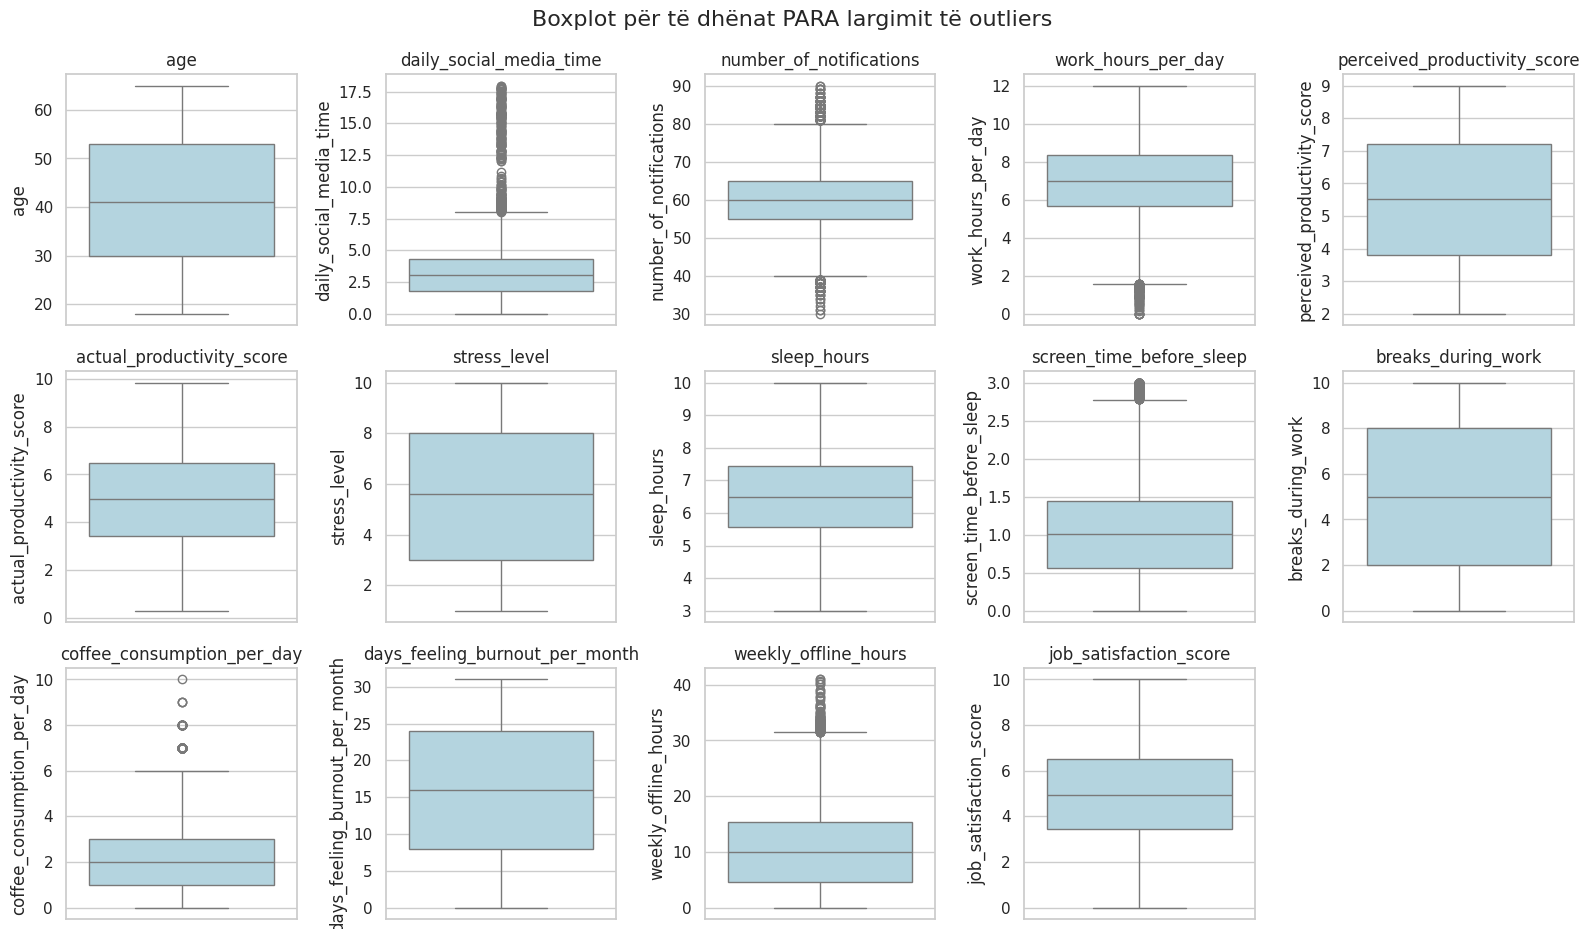

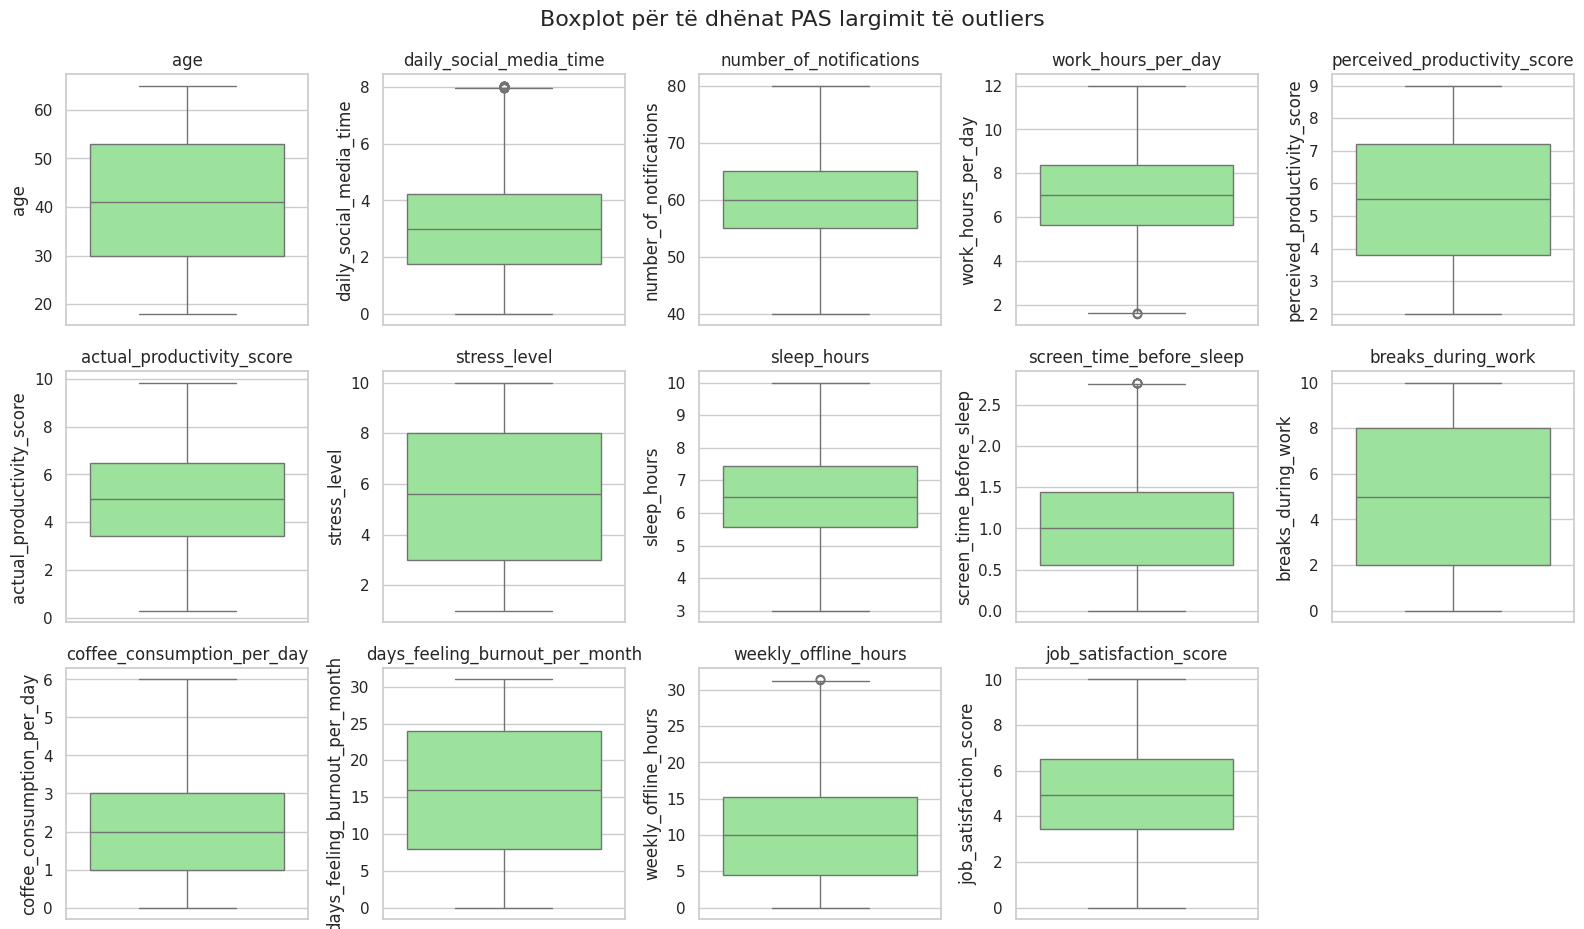


🔍 Rreshta para: 30000
✅ Rreshta pas heqjes së outliers: 28956
📉 Rreshta të hequr: 1044


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Lista e kolonave numerike për të analizuar outliers
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# 1️⃣ Vizualizim para heqjes së outliers
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 5, i+1)
    sns.boxplot(data=df, y=col, color='lightblue')
    plt.title(col)
plt.tight_layout()
plt.suptitle("Boxplot për të dhënat PARA largimit të outliers", y=1.02, fontsize=16)
plt.show()

# 2️⃣ Largimi i outliers me metodën IQR
def remove_outliers_iqr(data, columns):
    df_clean = data.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Apliko funksionin për të larguar outliers
df_no_outliers = remove_outliers_iqr(df, numeric_cols)

# 3️⃣ Vizualizim pas largimit të outliers
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 5, i+1)
    sns.boxplot(data=df_no_outliers, y=col, color='lightgreen')
    plt.title(col)
plt.tight_layout()
plt.suptitle("Boxplot për të dhënat PAS largimit të outliers", y=1.02, fontsize=16)
plt.show()

# 4️⃣ Kontroll: Sa rreshta janë hequr?
print(f"\n🔍 Rreshta para: {len(df)}")
print(f"✅ Rreshta pas heqjes së outliers: {len(df_no_outliers)}")
print(f"📉 Rreshta të hequr: {len(df) - len(df_no_outliers)}")


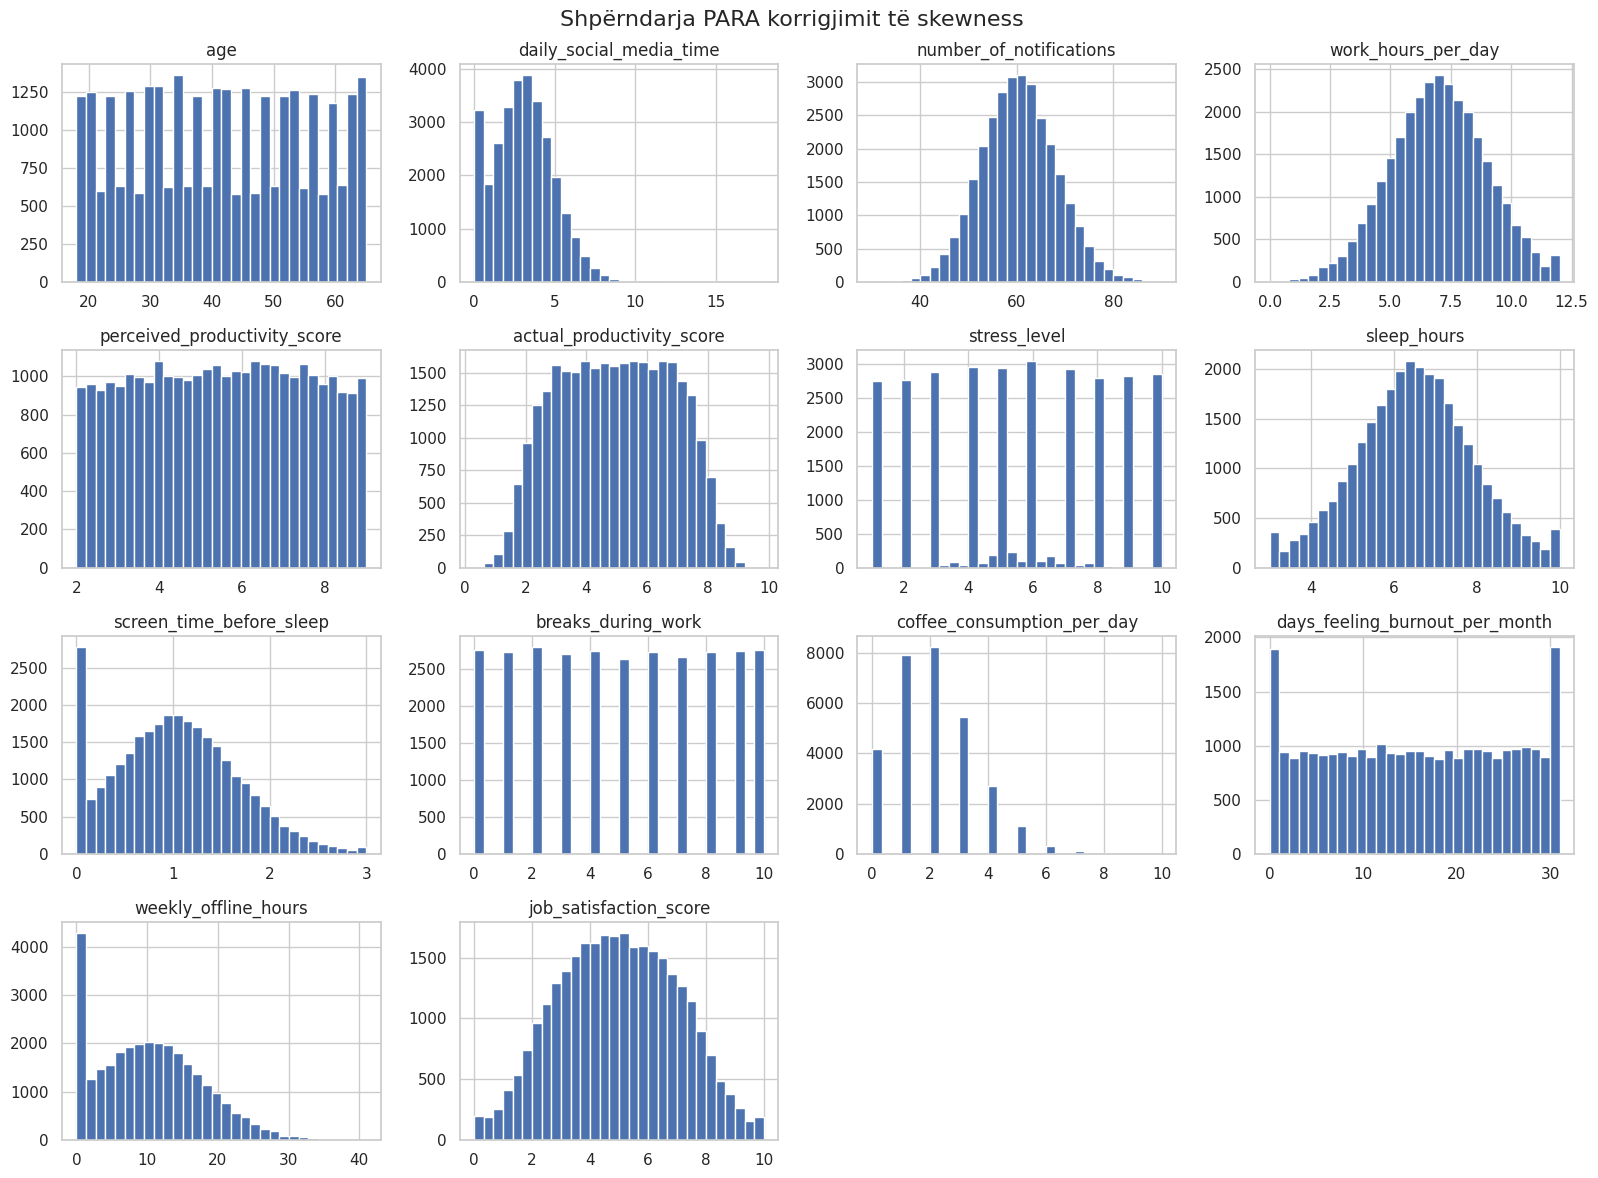

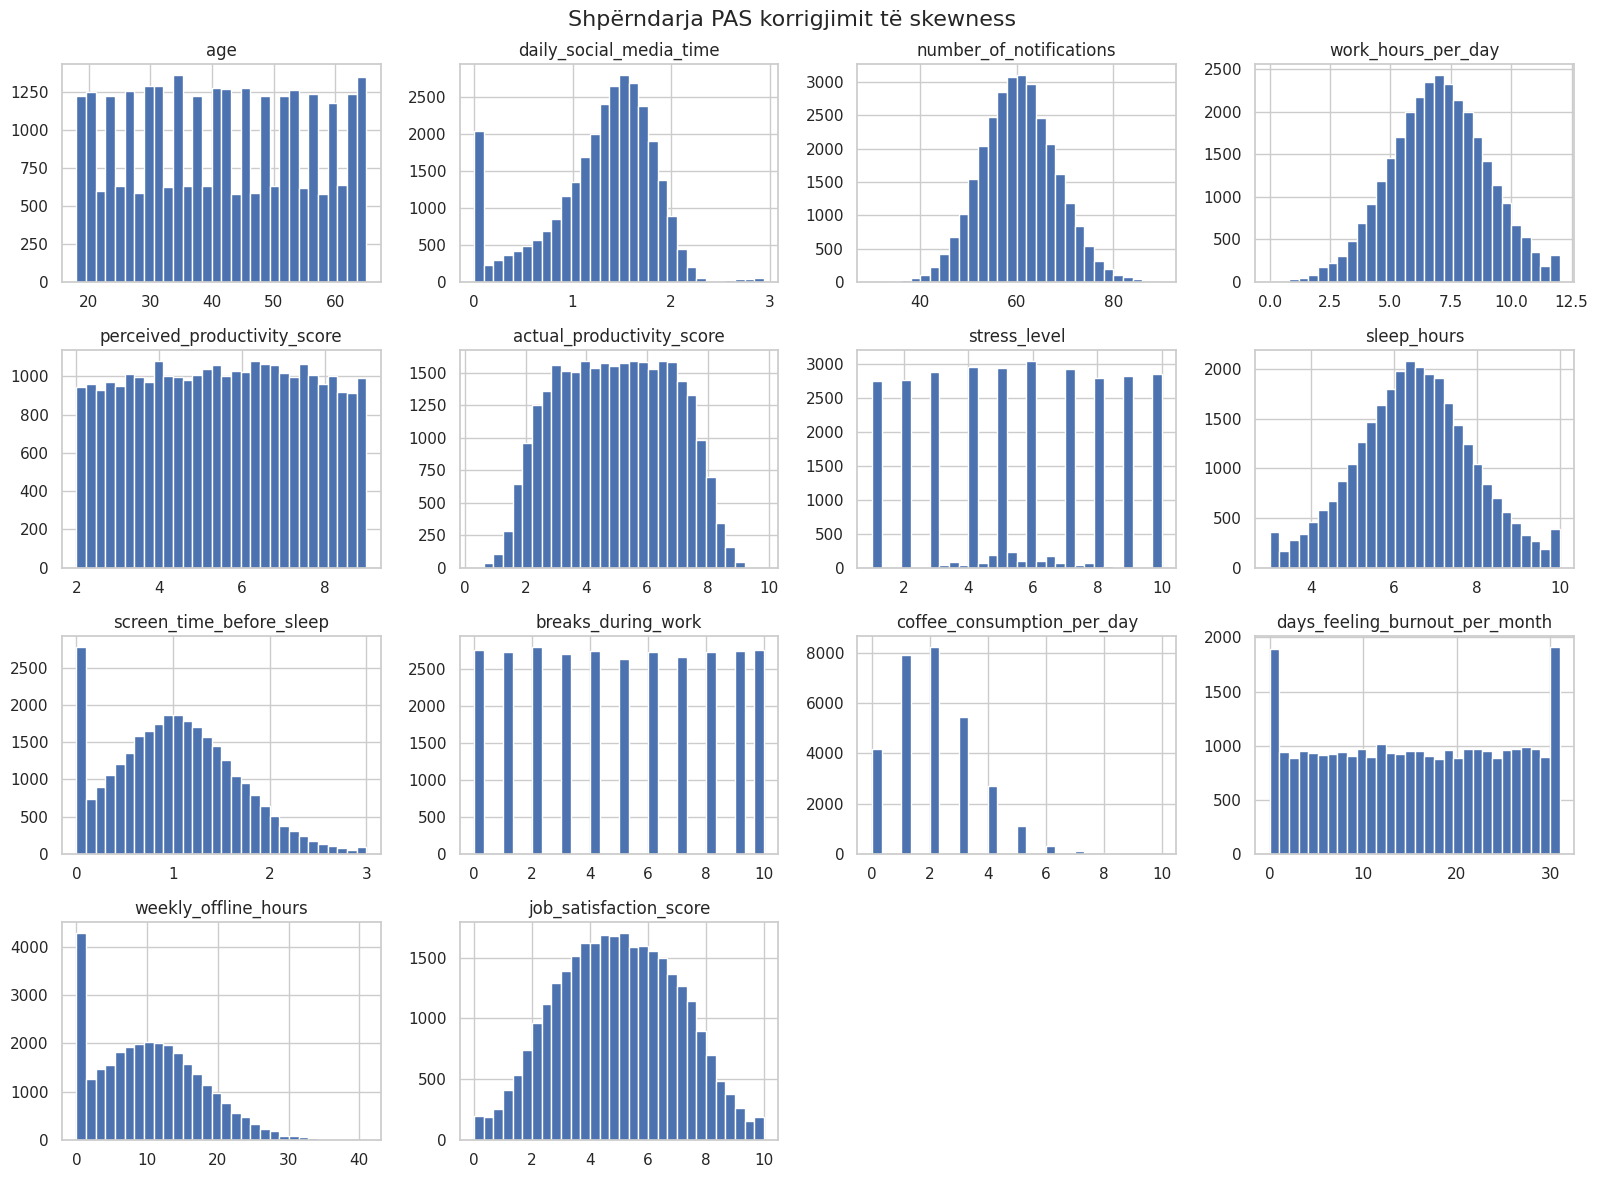

                                Skew Before  Skew After
age                                0.015304    0.015304
daily_social_media_time            1.218512   -0.760337
number_of_notifications            0.117731    0.117731
work_hours_per_day                -0.038160   -0.038160
perceived_productivity_score      -0.013163   -0.013163
actual_productivity_score         -0.008819   -0.008819
stress_level                       0.000320    0.000320
sleep_hours                        0.004706    0.004706
screen_time_before_sleep           0.311643    0.311643
breaks_during_work                 0.006697    0.006697
coffee_consumption_per_day         0.674717    0.674717
days_feeling_burnout_per_month    -0.007784   -0.007784
weekly_offline_hours               0.423338    0.423338
job_satisfaction_score             0.007978    0.007978


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Kopjo datasetin për të punuar në të
df_skew = df.copy()

# Gjej kolonat numerike
numeric_cols = df_skew.select_dtypes(include=['float64', 'int64']).columns

# Llogarit skewness përpara transformimit
skew_values_before = {}
for col in numeric_cols:
    skew_val = skew(df_skew[col].dropna())
    skew_values_before[col] = skew_val

# Vizualizo shpërndarjen përpara transformimit
df_skew[numeric_cols].hist(figsize=(16, 12), bins=30)
plt.suptitle("Shpërndarja PARA korrigjimit të skewness", fontsize=16)
plt.tight_layout()
plt.show()

# Apliko transformim log për kolonat me skewness > 1
for col in numeric_cols:
    if skew_values_before[col] > 1:
        df_skew[col] = np.log1p(df_skew[col])

# Llogarit skewness pas transformimit
skew_values_after = {}
for col in numeric_cols:
    skew_val = skew(df_skew[col].dropna())
    skew_values_after[col] = skew_val

# Vizualizo shpërndarjen pas transformimit
df_skew[numeric_cols].hist(figsize=(16, 12), bins=30)
plt.suptitle("Shpërndarja PAS korrigjimit të skewness", fontsize=16)
plt.tight_layout()
plt.show()

# Trego skewness para dhe pas në një DataFrame
skew_df = pd.DataFrame({
    "Skew Before": skew_values_before,
    "Skew After": skew_values_after
})

print(skew_df)


In [7]:
from sklearn.preprocessing import StandardScaler

# Kopjo datasetin e pastër dhe të korrigjuar për skewness
df_scaled = df_skew.copy()

# Vetëm kolonat numerike do të shkallëzohen
numeric_cols = df_scaled.select_dtypes(include=['float64', 'int64']).columns

# Inicioni standard scaler
scaler = StandardScaler()

# Zbato normalizimin
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

# Shfaq 5 rreshtat e parë për të parë rezultatin
print(df_scaled.head())


        age  gender    job_type  daily_social_media_time  \
0  1.049017    Male  Unemployed                 0.660170   
1  0.326212    Male      Health                 0.299734   
2 -0.685715    Male     Finance                 0.209689   
3  1.338138  Female  Unemployed                 0.668588   
4 -1.191679    Male          IT                -0.005974   

  social_platform_preference  number_of_notifications  work_hours_per_day  \
0                   Facebook                 0.134811           -0.118753   
1                    Twitter                -0.124134            1.090505   
2                    Twitter                -0.383079            0.460609   
3                   Facebook                -0.124134           -0.318248   
4                   Telegram                 0.782174           -0.388795   

   perceived_productivity_score  actual_productivity_score  stress_level  \
0                      1.269267                   1.266179     -0.542286   
1                     -0

In [8]:
# Importo funksionin për encoding
from sklearn.preprocessing import OneHotEncoder

# Ose metoda më e thjeshtë me pandas:
categorical_cols = ['gender', 'job_type', 'social_platform_preference', 
                    'uses_focus_apps', 'has_digital_wellbeing_enabled']

# Zbato one-hot encoding dhe ruaje si dataset të ri
df_encoded = pd.get_dummies(df_scaled, columns=categorical_cols, drop_first=True)

# Shfaq kolonat për të parë nëse janë koduar mirë
print(df_encoded.columns)


Index(['age', 'daily_social_media_time', 'number_of_notifications',
       'work_hours_per_day', 'perceived_productivity_score',
       'actual_productivity_score', 'stress_level', 'sleep_hours',
       'screen_time_before_sleep', 'breaks_during_work',
       'coffee_consumption_per_day', 'days_feeling_burnout_per_month',
       'weekly_offline_hours', 'job_satisfaction_score', 'gender_Male',
       'gender_Other', 'job_type_Finance', 'job_type_Health', 'job_type_IT',
       'job_type_Student', 'job_type_Unemployed',
       'social_platform_preference_Instagram',
       'social_platform_preference_Telegram',
       'social_platform_preference_TikTok',
       'social_platform_preference_Twitter', 'uses_focus_apps_True',
       'has_digital_wellbeing_enabled_True'],
      dtype='object')


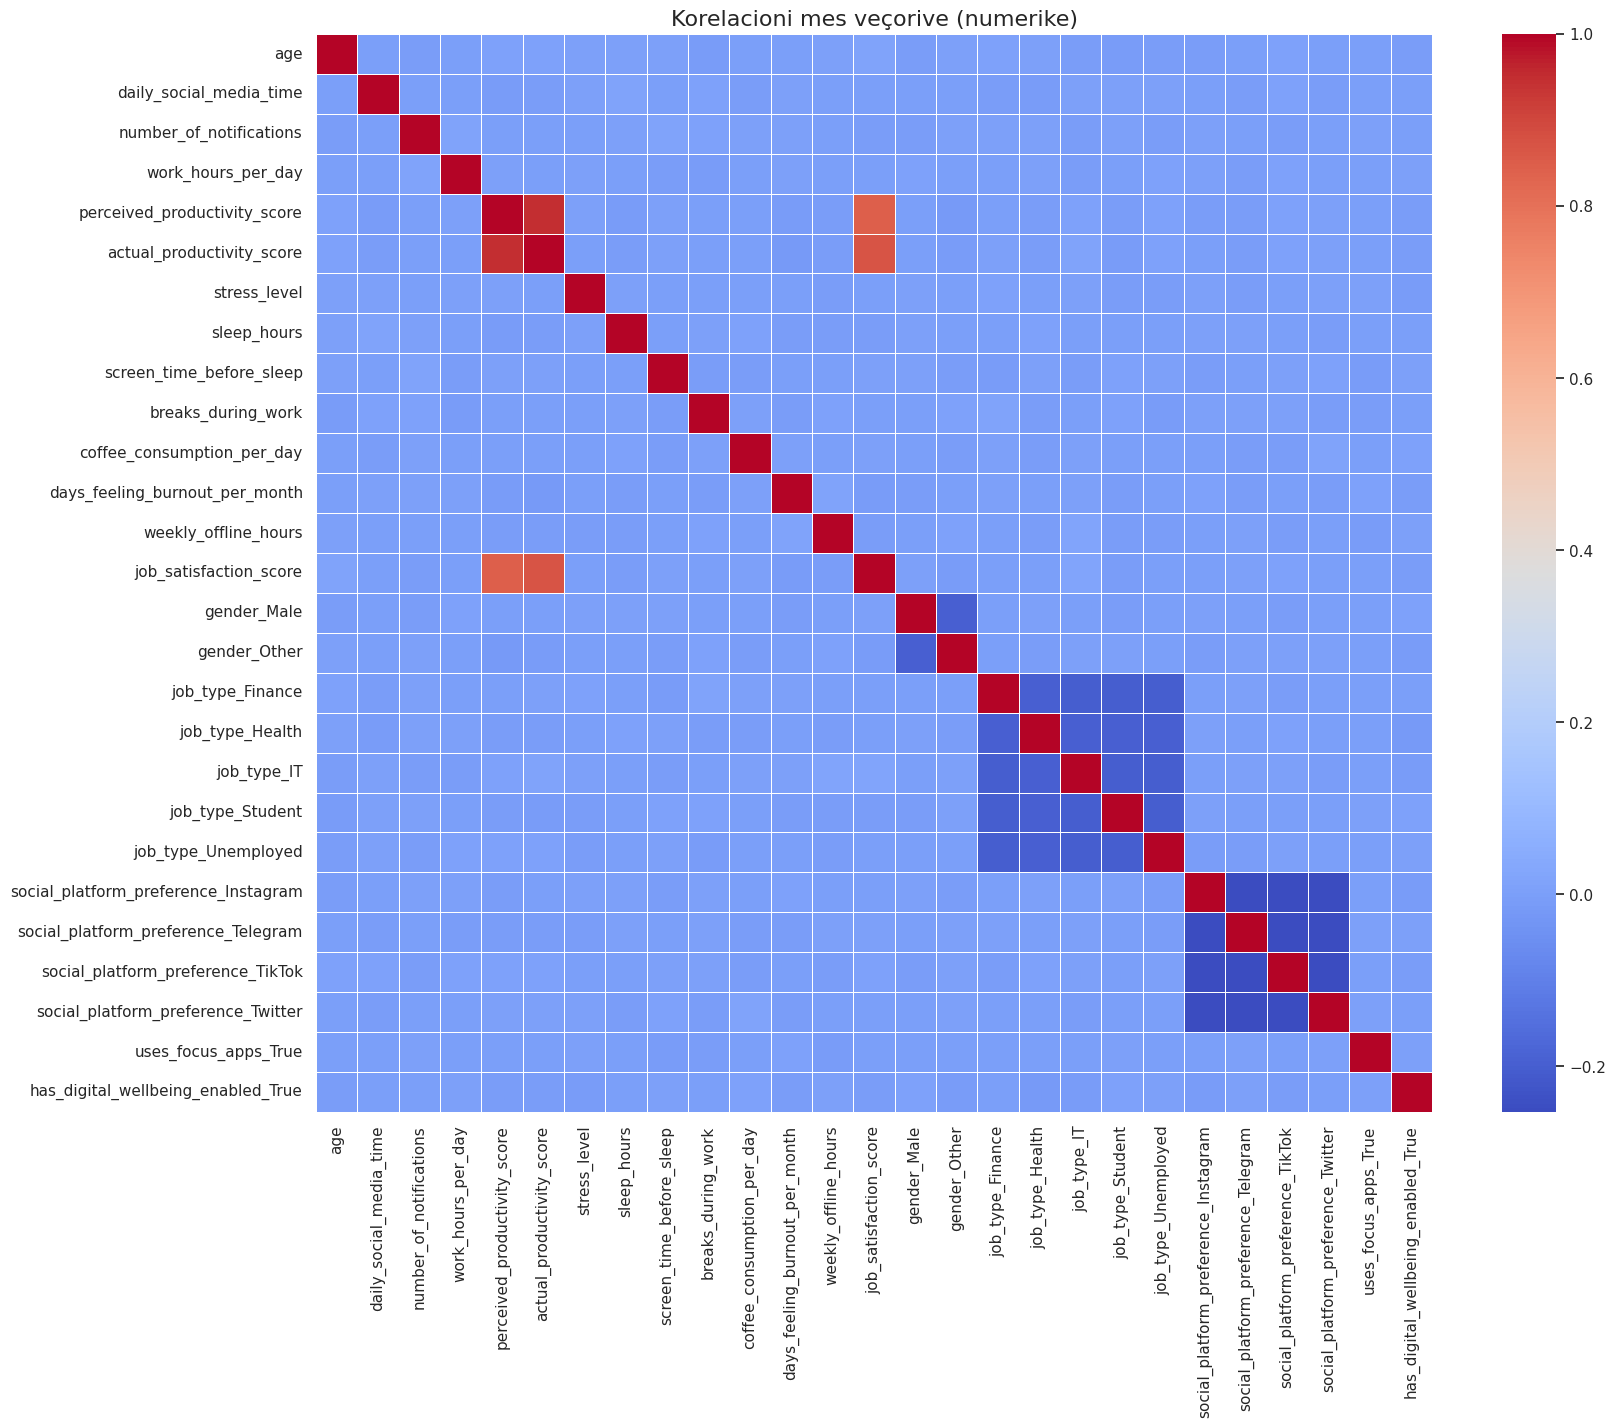

Korelacioni me actual_productivity_score:

actual_productivity_score: 1.0
perceived_productivity_score: 0.9495
job_satisfaction_score: 0.8715
job_type_IT: 0.0141
age: 0.0091
social_platform_preference_TikTok: 0.0074
job_type_Unemployed: 0.007
social_platform_preference_Twitter: 0.0046
screen_time_before_sleep: 0.0028
job_type_Finance: 0.0027
stress_level: 0.0016
gender_Male: 0.0012
work_hours_per_day: 0.001
coffee_consumption_per_day: 0.0003
social_platform_preference_Instagram: 0.0001
number_of_notifications: -0.0013
uses_focus_apps_True: -0.0022
breaks_during_work: -0.003
weekly_offline_hours: -0.0046
has_digital_wellbeing_enabled_True: -0.0055
job_type_Health: -0.0058
social_platform_preference_Telegram: -0.0059
sleep_hours: -0.0074
daily_social_media_time: -0.0076
job_type_Student: -0.0106
gender_Other: -0.0109
days_feeling_burnout_per_month: -0.013


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Llogarit korelacionin (vetëm për kolonat numerike)
corr_matrix = df_encoded.corr(numeric_only=True)

# 2️⃣ Paraqit heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Korelacioni mes veçorive (numerike)", fontsize=16)
plt.show()

# Llogarit korelacionet vetëm për kolonat numerike
correlation_with_target = df_encoded.corr(numeric_only=True)['actual_productivity_score'].sort_values(ascending=False)

# Shfaq korelacionin në formë liste
print("Korelacioni me actual_productivity_score:\n")
for feature, corr in correlation_with_target.items():
    print(f"{feature}: {round(corr, 4)}")


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Targeti
y = df_encoded['actual_productivity_score']

# Hiq targetin nga veçoritë
X = df_encoded.drop(columns=['actual_productivity_score'])

# Ndarje në train dhe test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizim (normalizim i të dhënave)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Trajno modelin
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Parashikimet
y_pred_rf = rf_model.predict(X_test_scaled)

# Vlerësimi
print("Random Forest Results:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R² score:", r2_score(y_test, y_pred_rf))


Random Forest Results:
MSE: 0.08411593321004729
R² score: 0.9152131295970424


In [12]:
from xgboost import XGBRegressor

# Trajno modelin
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Parashikimet
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Vlerësimi
print("\nXGBoost Results:")
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("R² score:", r2_score(y_test, y_pred_xgb))



XGBoost Results:
MSE: 0.08805687432256297
R² score: 0.9112407542025001


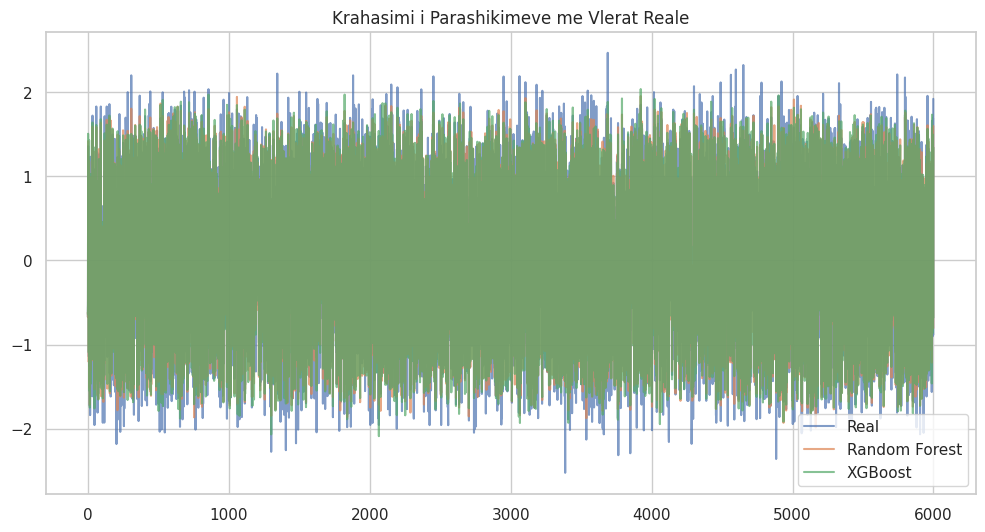

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Real', alpha=0.7)
plt.plot(y_pred_rf, label='Random Forest', alpha=0.7)
plt.plot(y_pred_xgb, label='XGBoost', alpha=0.7)
plt.title("Krahasimi i Parashikimeve me Vlerat Reale")
plt.legend()
plt.show()


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Për shembull me Random Forest
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(random_state=42)

# 5-fold CV për R² score
r2_scores = cross_val_score(model_rf, X, y, cv=5, scoring='r2')
print(f"Mesatarja e R² nga CV: {r2_scores.mean():.4f}")
print(f"Devijimi standard i R²: {r2_scores.std():.4f}")


Mesatarja e R² nga CV: 0.9143
Devijimi standard i R²: 0.0025


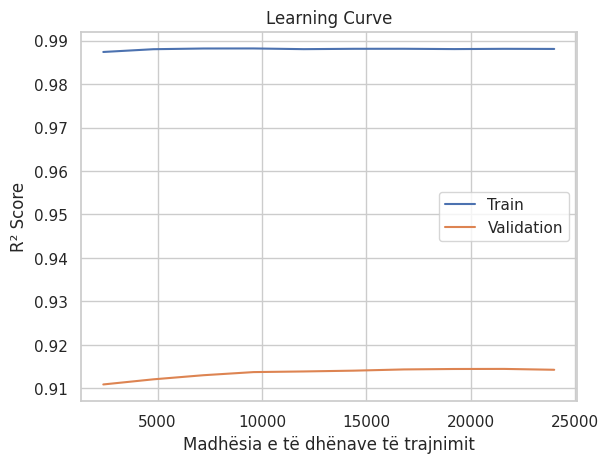

In [15]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, val_scores = learning_curve(
    model_rf, X, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label="Train")
plt.plot(train_sizes, val_scores_mean, label="Validation")
plt.xlabel("Madhësia e të dhënave të trajnimit")
plt.ylabel("R² Score")
plt.title("Learning Curve")
plt.legend()
plt.show()
